# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mola di bari
Processing Record 2 of Set 1 | saiha
Processing Record 3 of Set 1 | bolands
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hiratacho
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | guia lopes da laguna
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | north bay
Processing Record 12 of Set 1 | kilindoni
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto deseado
Processing Record 15 of Set 1 | kochi
Processing Record 16 of Set 1 | al ghayzah
Processing Record 17 of Set 1 | ponta delgada
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | lianzhou
Processing Record

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mola di bari,41.0609,17.0873,20.21,75,100,3.20,IT,1699379656
1,saiha,22.4833,92.9667,16.34,79,8,1.37,IN,1699379656
2,bolands,17.0657,-61.8747,30.61,74,40,3.09,AG,1699379656
3,iqaluit,63.7506,-68.5145,-9.15,78,100,3.09,CA,1699379652
4,grytviken,-54.2811,-36.5092,5.19,70,84,1.19,GS,1699379656


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mola di bari,41.0609,17.0873,20.21,75,100,3.20,IT,1699379656
1,saiha,22.4833,92.9667,16.34,79,8,1.37,IN,1699379656
2,bolands,17.0657,-61.8747,30.61,74,40,3.09,AG,1699379656
3,iqaluit,63.7506,-68.5145,-9.15,78,100,3.09,CA,1699379652
4,grytviken,-54.2811,-36.5092,5.19,70,84,1.19,GS,1699379656


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

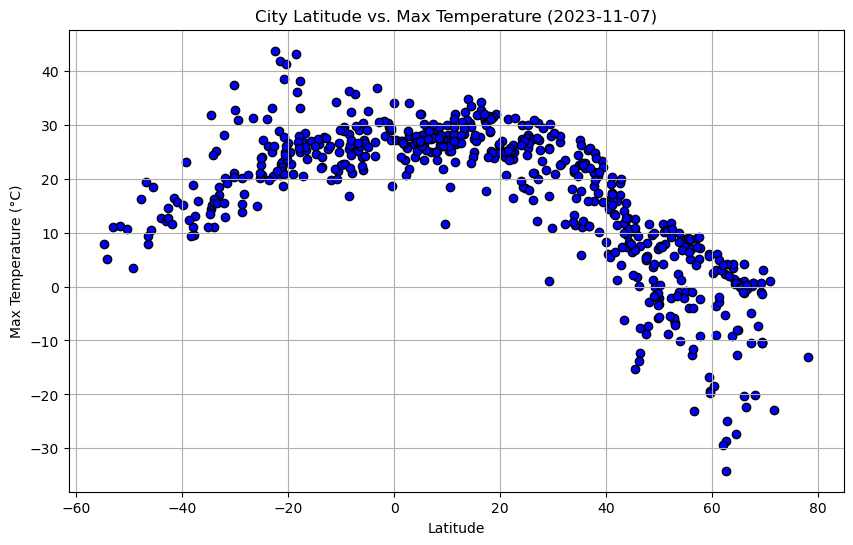

In [18]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", edgecolor="black")


# Incorporate the other graph properties
current_date=time.localtime()
current_date_formatted=time.strftime("%Y-%m-%d", current_date)
plt.title(f"City Latitude vs. Max Temperature ({current_date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

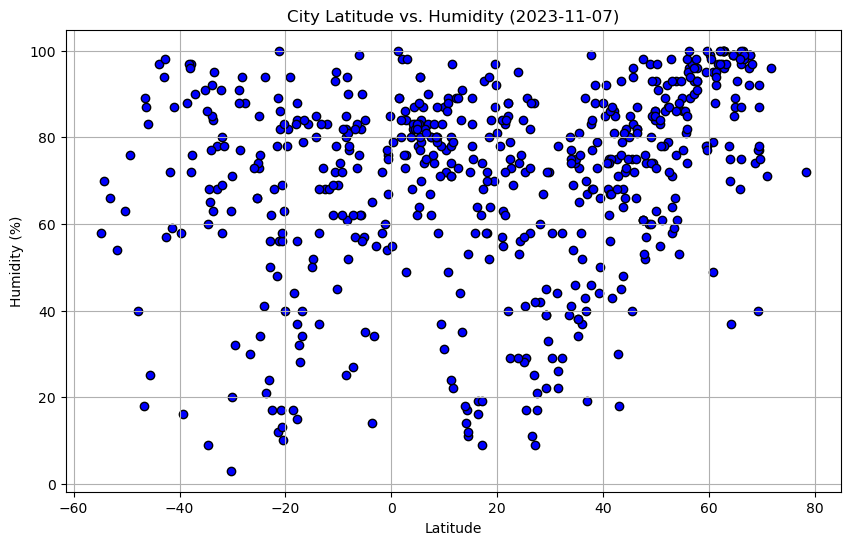

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

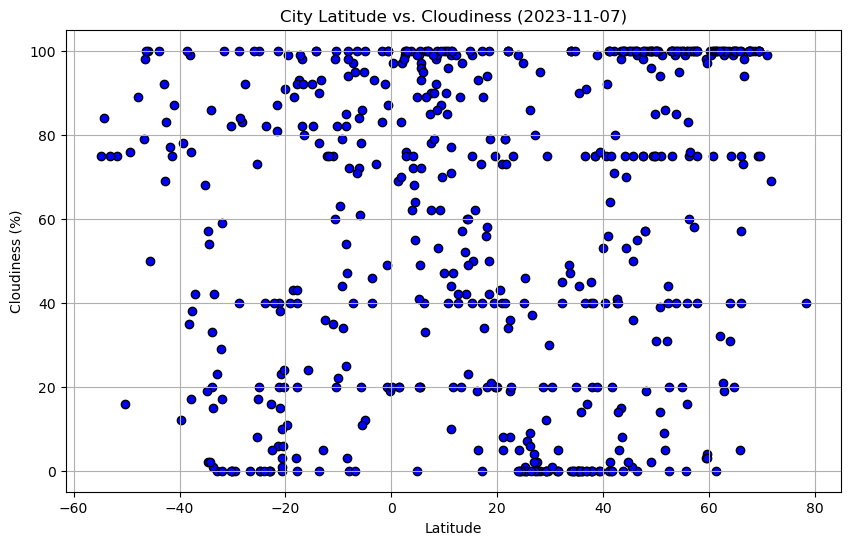

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

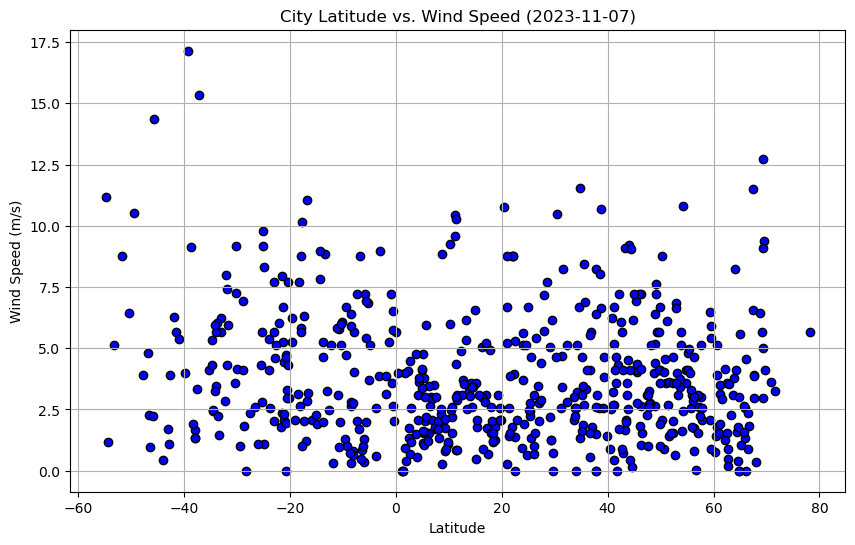

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color="blue", marker="o")
    plt.plot(x, regression_line, color="red")
    equation_label=f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_label, xy=(0.4, 0.9), xycoords='axes fraction', fontsize=16, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    plt.show()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mola di bari,41.0609,17.0873,20.21,75,100,3.20,IT,1699379656
1,saiha,22.4833,92.9667,16.34,79,8,1.37,IN,1699379656
2,bolands,17.0657,-61.8747,30.61,74,40,3.09,AG,1699379656
3,iqaluit,63.7506,-68.5145,-9.15,78,100,3.09,CA,1699379652
5,hiratacho,35.4333,132.8167,11.01,73,0,1.85,JP,1699379657


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,5.19,70,84,1.19,GS,1699379656
6,bredasdorp,-34.5322,20.0403,14.37,60,57,2.42,ZA,1699379657
7,guia lopes da laguna,-21.4578,-56.1142,41.73,12,6,2.36,BR,1699379657
8,port-aux-francais,-49.3500,70.2167,3.50,76,76,10.51,TF,1699379657
11,kilindoni,-7.9139,39.6668,26.45,77,0,4.03,TZ,1699379658


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8499981185420473


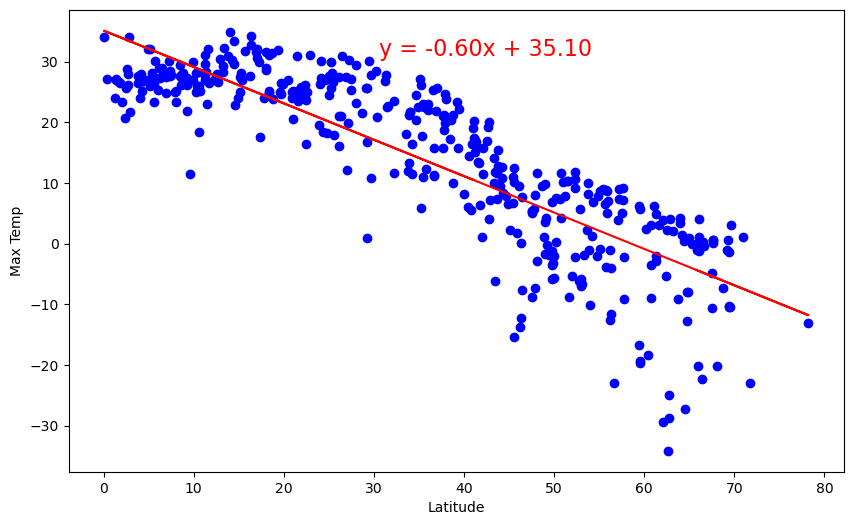

In [85]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.6541736071264503


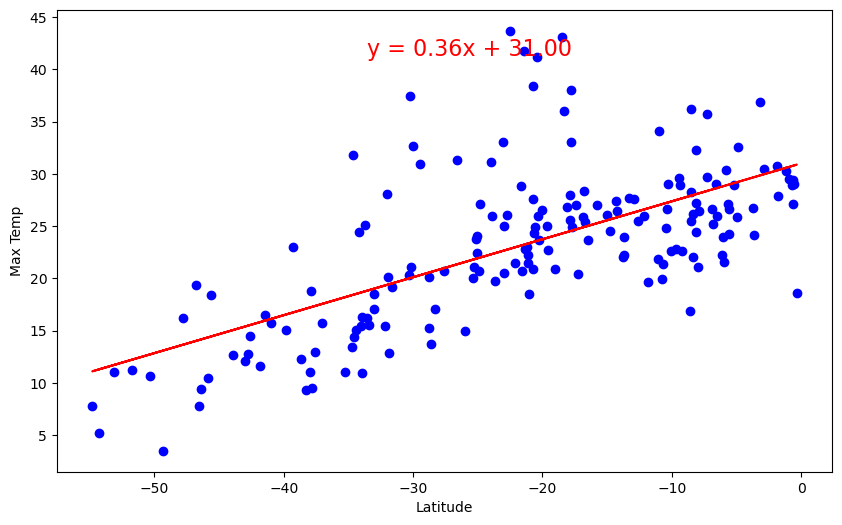

In [86]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** 
If we look at Northern Hemisphere data, we will see that as latitude increases, the maximum temperature decreases. In other words, there is a negative correlation between these parameters. If we look at Southern Hemisphere data, we will see that as latitude increases, the maximum temperature increases too. In other words, there is a positive correlation between these parameters. These relationships imply that, as you move closer to the equator, you can expect an increase in maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26475399067256283


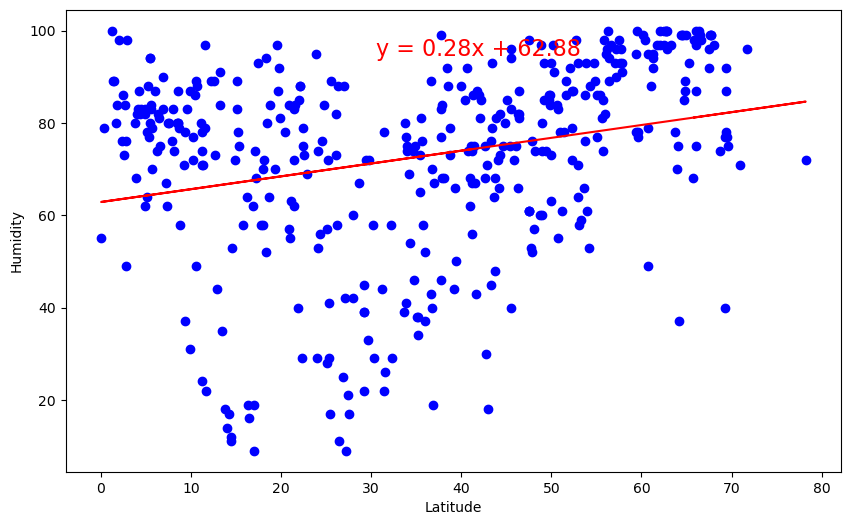

In [87]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")


The r-value is: -0.0369743616610424


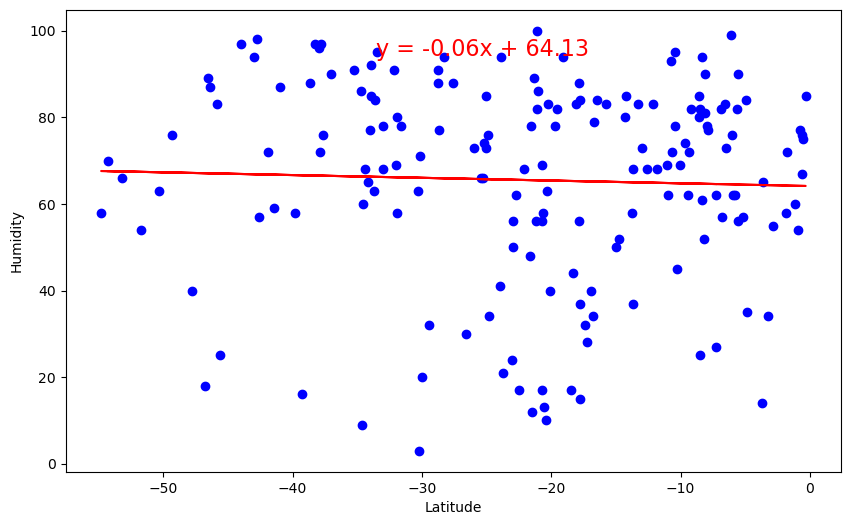

In [88]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")


**Discussion about the linear relationship:** 
The linear equations and R-values suggest weak relationships between latitude and humidity in both the Northern and Southern Hemispheres. In the Northern Hemisphere, there is a slight positive correlation, while in the Southern Hemisphere, the correlation is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13390353592609677


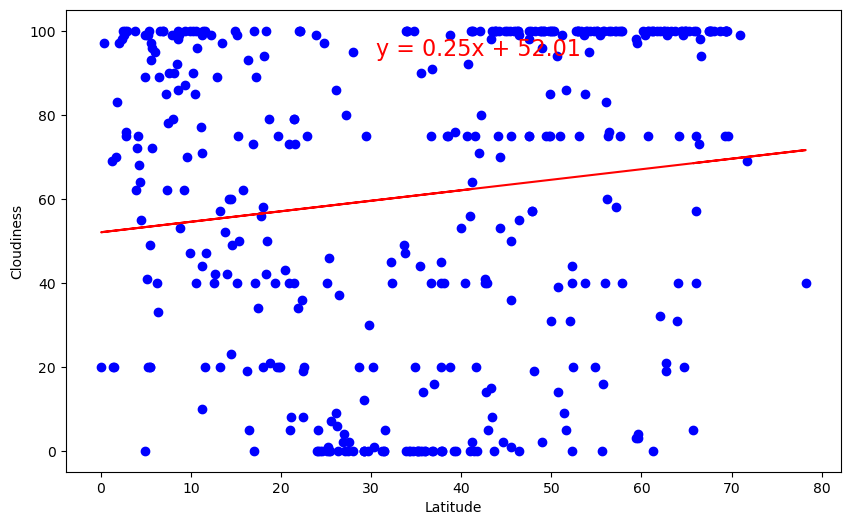

In [89]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


The r-value is: 0.04845174226292145


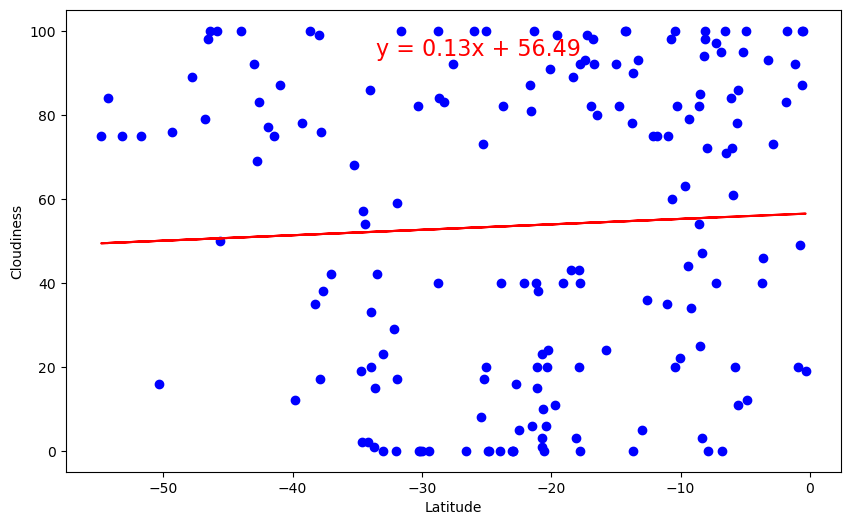

In [90]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


**Discussion about the linear relationship:** 
The linear equations and R-values suggest weak relationships between latitude and cloudiness in both the Northern and Southern Hemispheres. The correlations are positive, meaning that cloudiness tends to increase as you move away from the equator (in both hemispheres), but the relationships are relatively weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10965434065012873


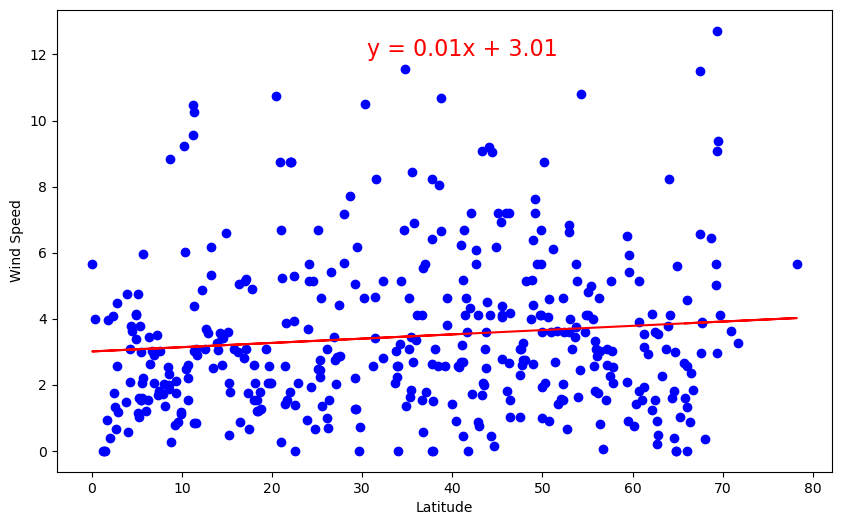

In [91]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")


The r-value is: -0.15668993857140748


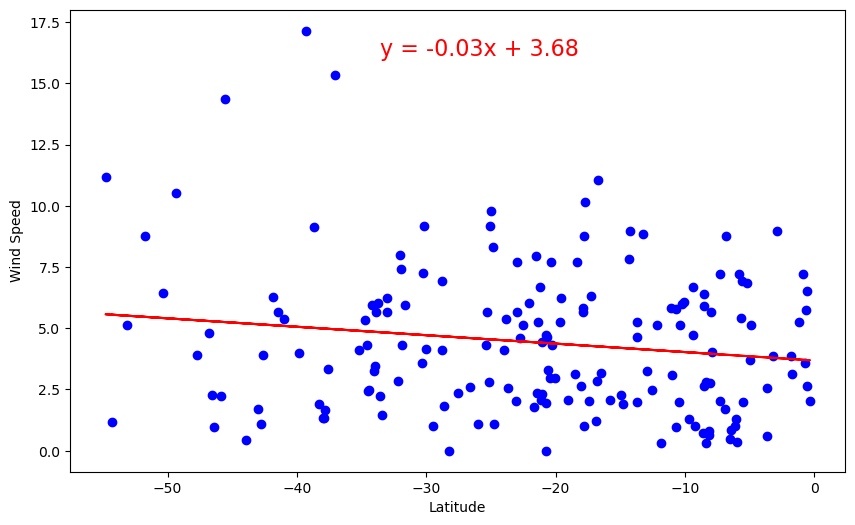

In [92]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")


**Discussion about the linear relationship:** 
The linear equations and R-values suggest weak relationships between latitude and wind speed in both the Northern and Southern Hemispheres. The correlations are either positive (Northern Hemisphere) or negative (Southern Hemisphere), but in both cases, the relationships are relatively weak.
